# PRACTICAL 6: Apply Logistic Regression on crime dataset

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_excel('3B.1 Crime against Women in Metropolitan Cities.xlsx')
df.rename(columns = {2018:'Year_2018',2019:'Year_2019',2020:'Year_2020'}, inplace = True)
df.head(3).transpose()

,0,1,2
City,Ahmedabad\n(Gujarat),Bengaluru\n(Karnataka),Chennai\n(Tamil Nadu)
Year_2018,1416,3427,761
Year_2019,1633,3486,729
Year_2020,1524,2730,576
Actual Population (in Lakhs) (2011),30.0,40.6,43.1
Rate of Total Crime against Women (2020),50.7,67.3,13.4
Chargesheeti ng Rate (2020),94.8,71.4,96.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   City                                      20 non-null     object 
 1   Year_2018                                 20 non-null     int64  
 2   Year_2019                                 20 non-null     int64  
 3   Year_2020                                 20 non-null     int64  
 4   Actual Population (in Lakhs) (2011)       20 non-null     float64
 5   Rate of Total Crime against Women (2020)  20 non-null     float64
 6   Chargesheeti ng Rate (2020)               20 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.2+ KB


In [5]:
df = df[0:19].set_index('City')

# creating a new column to perform logistic regression
df['Total Crime Rate > 50'] = (df['Rate of Total Crime against Women (2020)'] > 50).astype('int64')

df.head(3).transpose()

City,Ahmedabad\n(Gujarat),Bengaluru\n(Karnataka),Chennai\n(Tamil Nadu)
Year_2018,1416.0,3427.0,761.0
Year_2019,1633.0,3486.0,729.0
Year_2020,1524.0,2730.0,576.0
Actual Population (in Lakhs) (2011),30.0,40.6,43.1
Rate of Total Crime against Women (2020),50.7,67.3,13.4
Chargesheeti ng Rate (2020),94.8,71.4,96.8
Total Crime Rate > 50,1.0,1.0,0.0


In [8]:
# train test split
# 30% data points as test data

X,y = np.array(df['Year_2018']).reshape(-1,1),np.array(df['Total Crime Rate > 50'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=11)

In [9]:
# creating and training the model

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [10]:
# testing

# predicting on testing data
test_pred = model.predict(X_test)

# predicting on training data
train_pred = model.predict(X_train)

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_pred)
cm

array([[3, 0],
       [0, 3]], dtype=int64)

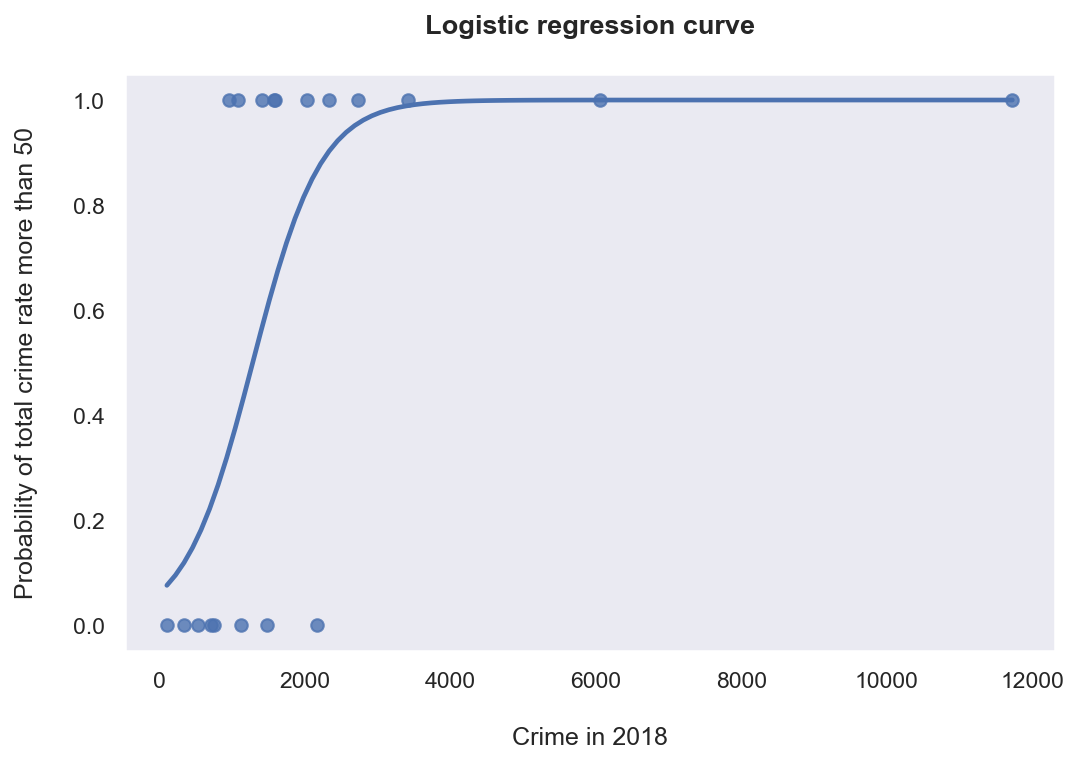

In [12]:
plt.figure(figsize=(8,5),dpi=150)
sns.set_theme(style='dark')

plot = sns.regplot(data=df,x='Year_2018',y='Total Crime Rate > 50', logistic=True, ci=None)
plot.set_xlabel('\nCrime in 2018')
plot.set_ylabel('Probability of total crime rate more than 50\n')
plot.set_title('Logistic regression curve\n',fontsize= 13,fontweight='bold')

plt.show()